# 1. Importing the dependencies

In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE    
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Data Loading and Understanding

In [372]:
# load the dataset to a pandas DataFrame
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 
df.shape

(7043, 21)

In [373]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [375]:
# drop the 'customerID' column as it is not useful for analysis
df.drop(columns=['customerID'], inplace=True )

In [376]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [377]:
# print the unique values in the all columns

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
    if col not in numeric_cols:
        print(f"{col}: {df[col].unique()}") 
        print("-" * 55)

gender: ['Female' 'Male']
-------------------------------------------------------
SeniorCitizen: [0 1]
-------------------------------------------------------
Partner: ['Yes' 'No']
-------------------------------------------------------
Dependents: ['No' 'Yes']
-------------------------------------------------------
PhoneService: ['No' 'Yes']
-------------------------------------------------------
MultipleLines: ['No phone service' 'No' 'Yes']
-------------------------------------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
-------------------------------------------------------
OnlineSecurity: ['No' 'Yes' 'No internet service']
-------------------------------------------------------
OnlineBackup: ['Yes' 'No' 'No internet service']
-------------------------------------------------------
DeviceProtection: ['No' 'Yes' 'No internet service']
-------------------------------------------------------
TechSupport: ['No' 'Yes' 'No internet service']
---------------------------

In [378]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [379]:
# changing the 'TotalCharges' column to numeric type
df['TotalCharges'] = df['TotalCharges'].replace({" ":"0.0"})
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [380]:
# checking the distribution of the target variable 'Churn'
print(df['Churn'].value_counts()) 

Churn
No     5174
Yes    1869
Name: count, dtype: int64


#### Insights:
'''
1. Customer ID removed as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the dataset


'''

# 3. EDA - Exploratory Data Analysis

In [381]:
df.shape

(7043, 20)

In [382]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [383]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [384]:
def plot_histogram(df, column):

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

    # calculate and display the mean and median
    mean = df[column].mean()
    median = df[column].median()

    # add vertical lines for mean and median
    plt.axvline(mean, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='blue', linestyle='-', linewidth=1.5, label=f'Median: {median:.2f}')
    plt.legend()
    plt.show()

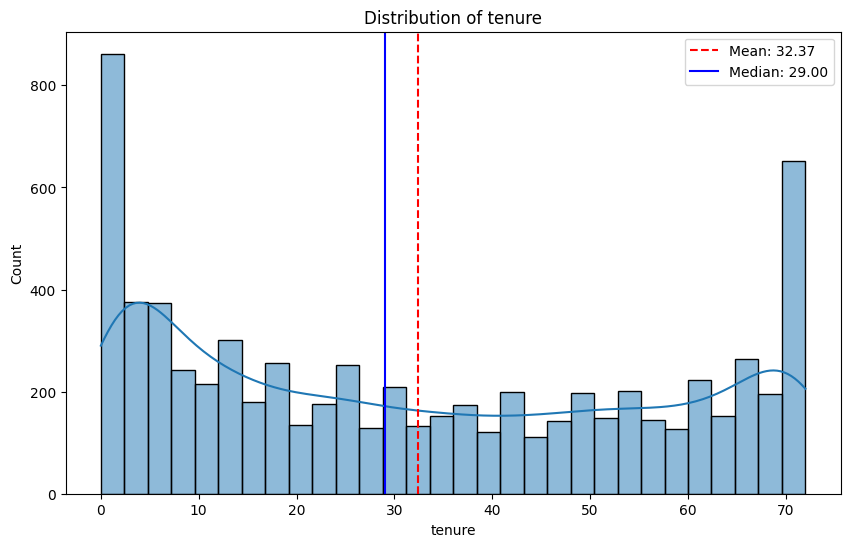

In [385]:
plot_histogram(df, 'tenure')

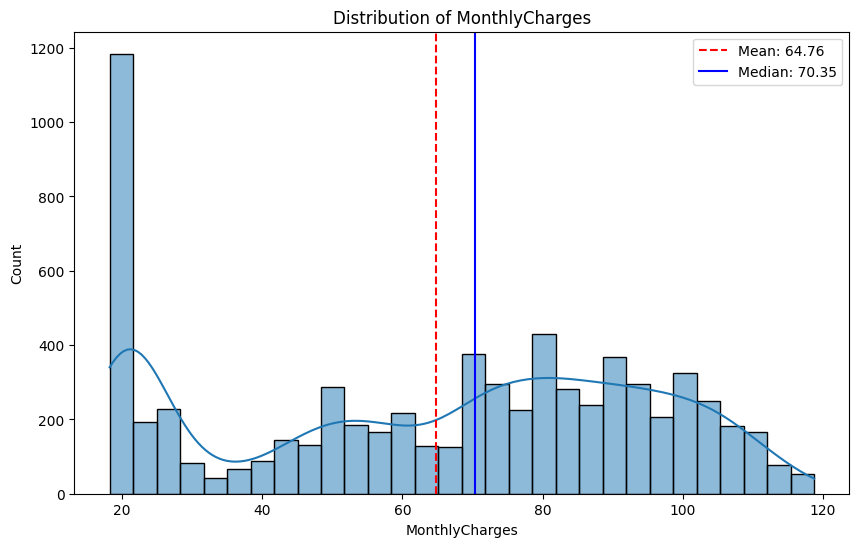

In [386]:

plot_histogram(df, 'MonthlyCharges')

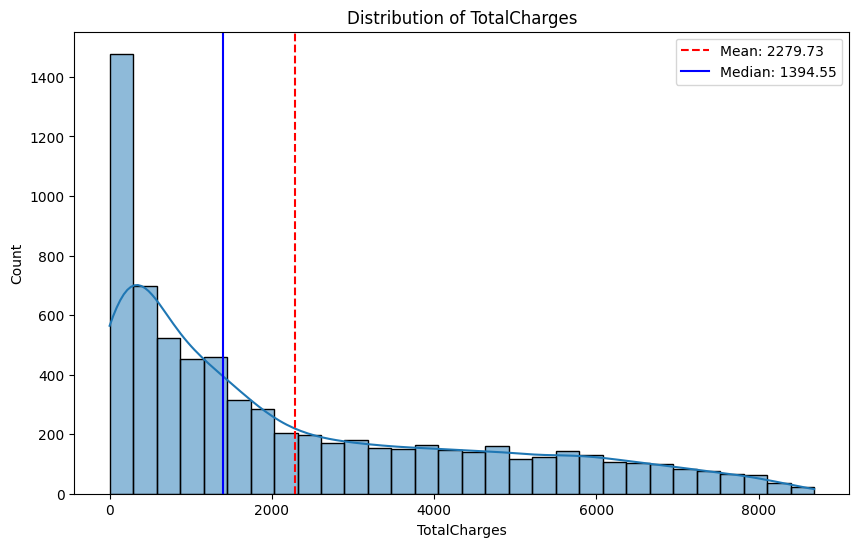

In [387]:
plot_histogram(df, 'TotalCharges')

In [388]:
def plot_boxplot(df, column):
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

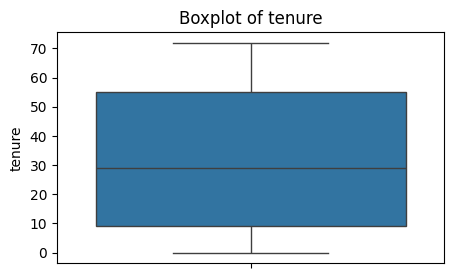

In [389]:
plot_boxplot(df, 'tenure')

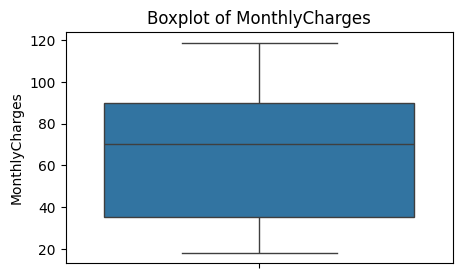

In [390]:
plot_boxplot(df,'MonthlyCharges')

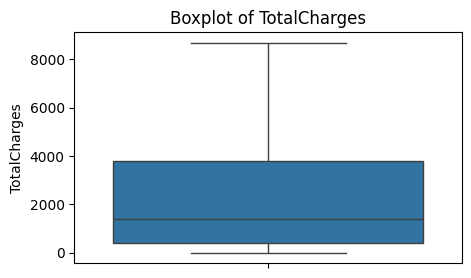

In [391]:
plot_boxplot(df,'TotalCharges')

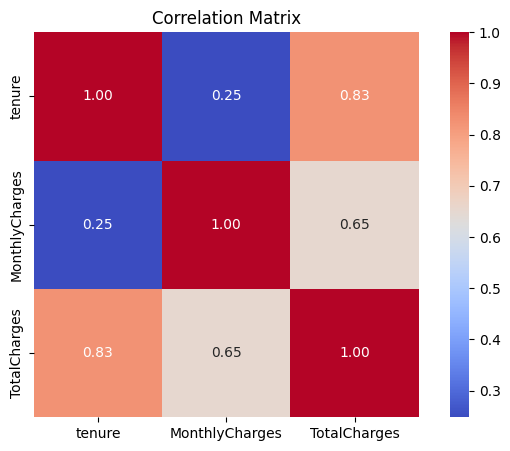

In [392]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#### countplot for categorical columns

In [393]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
object_cols = ["SeniorCitizen"] + object_cols
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

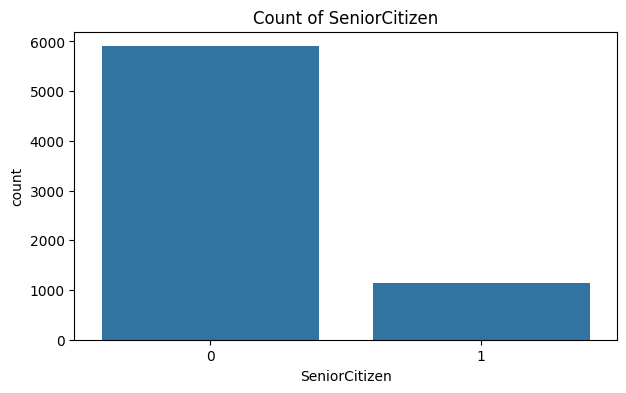

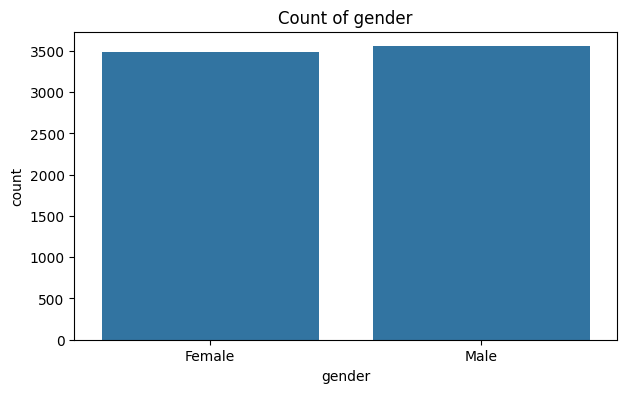

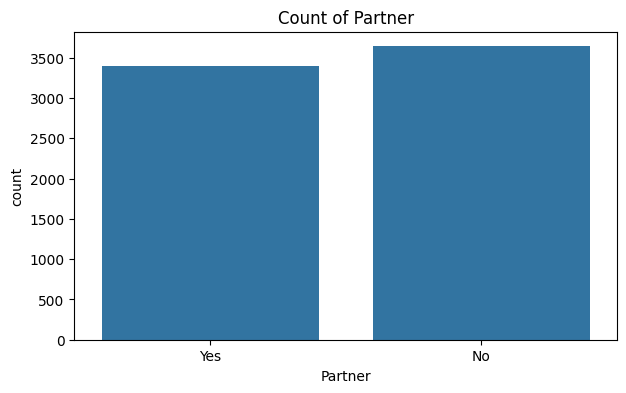

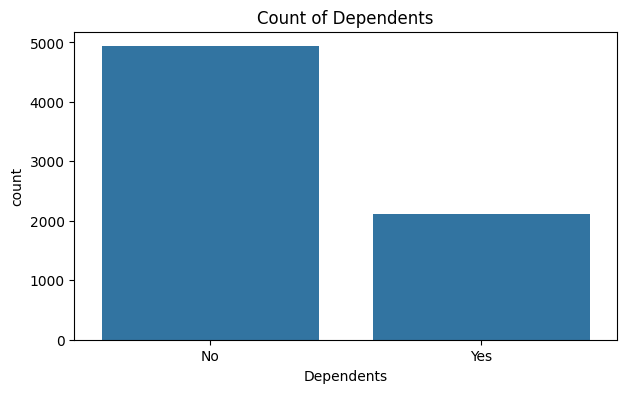

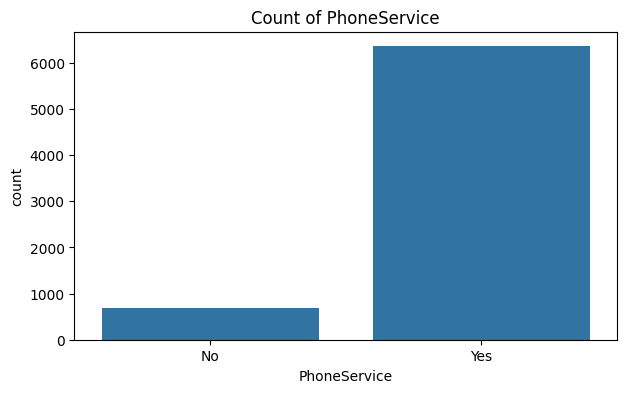

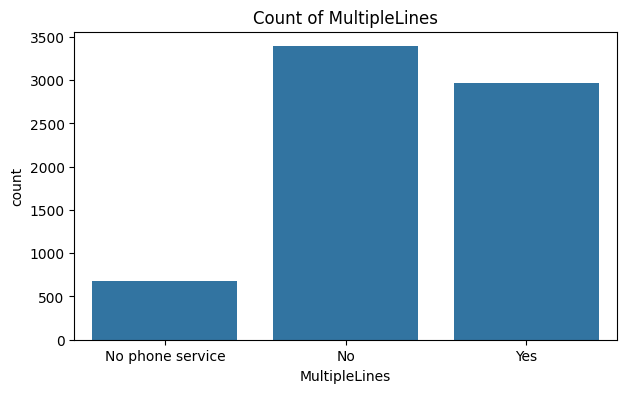

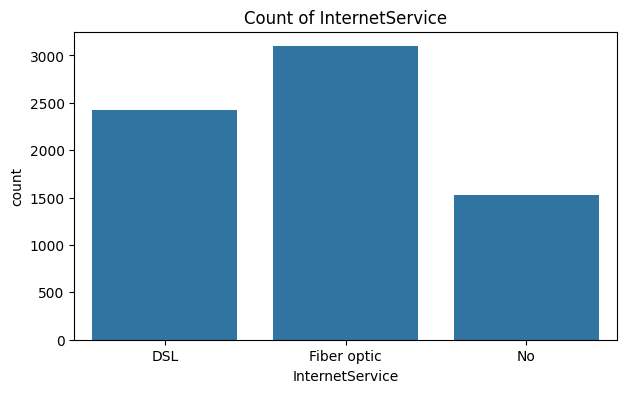

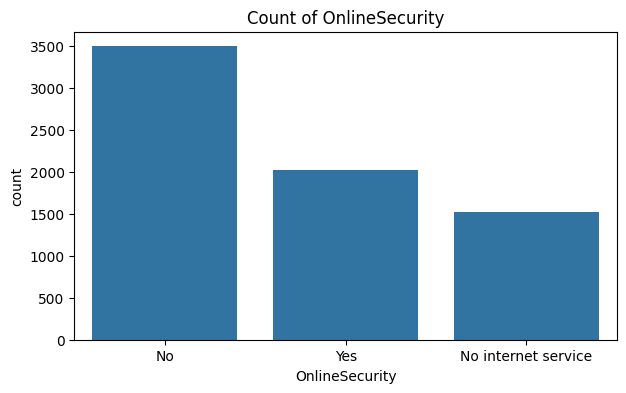

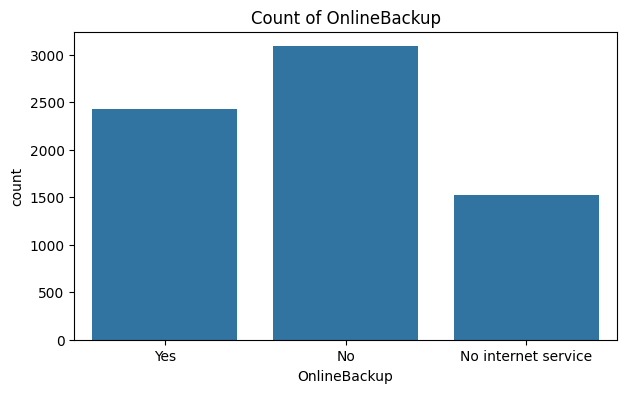

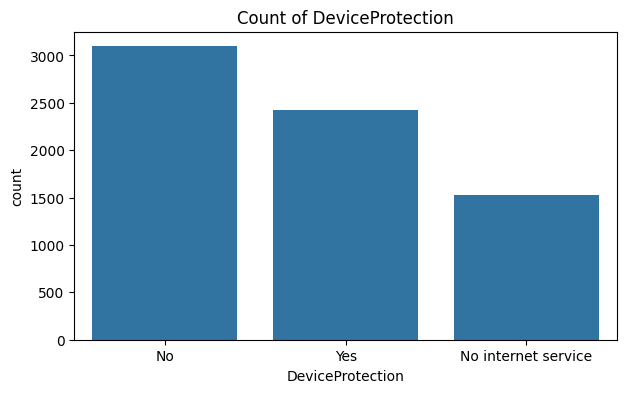

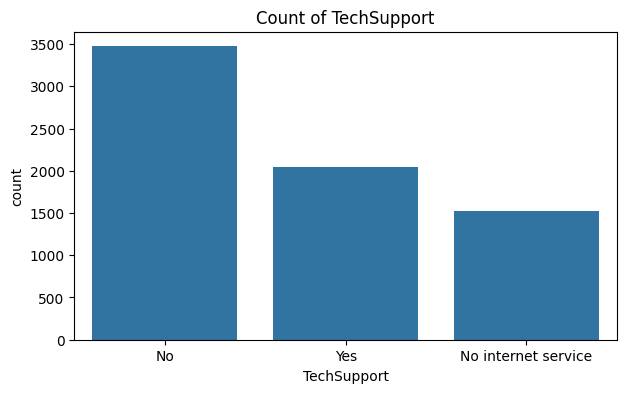

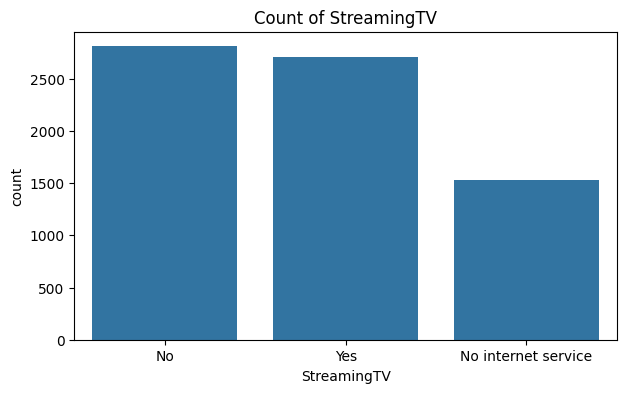

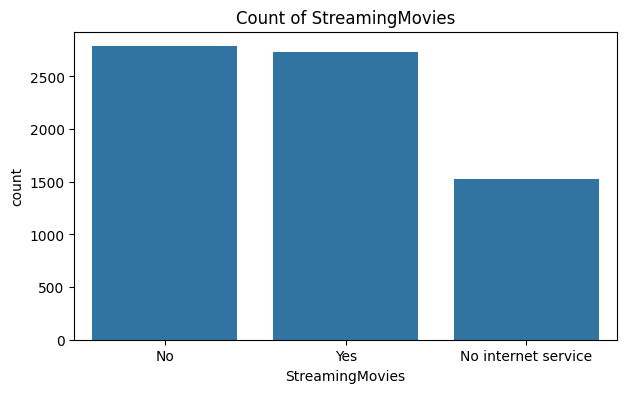

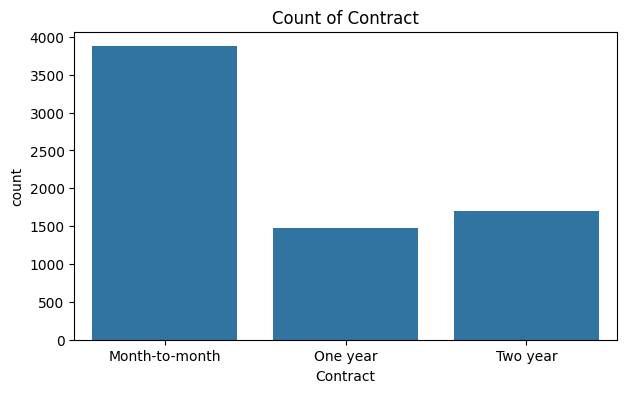

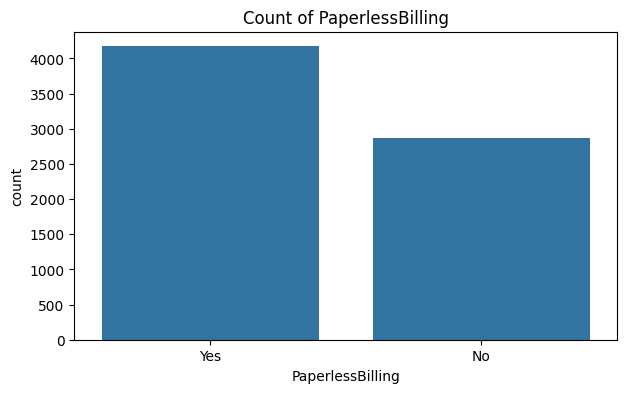

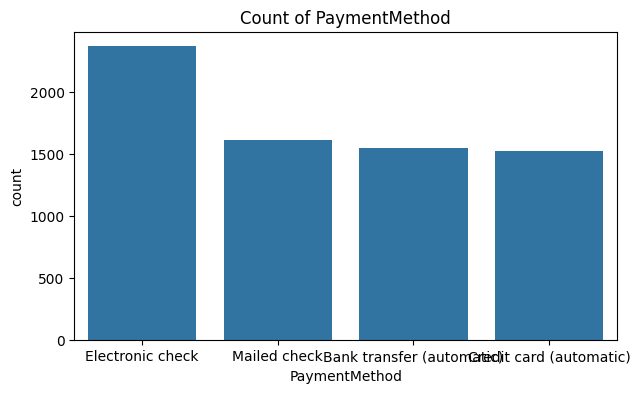

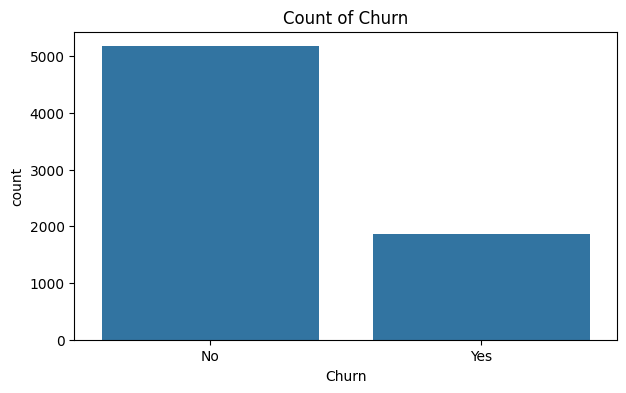

In [394]:
for col in object_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=df[col])
    plt.title(f'Count of {col}')
    plt.xlabel(col)

# 4. Data Preprocessing

#### Label Encoding of target column

In [395]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})
df.head(2)

C:\Users\thean\AppData\Local\Temp\ipykernel_19808\3154685706.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


#### Label encoding of categorical columns

In [396]:
object_cols = df.select_dtypes(include=['object']).columns
print(object_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [397]:
encoders = {}
for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# save the label encoders to a file
import joblib   
joblib.dump(encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [398]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### Training and Testing Data Split

In [399]:
# Split the dataset into features and target variable
X = df.drop(columns=["Churn"])  
y = df['Churn']

In [400]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [401]:
# Synthetic Minority Over-sampling Technique (SMOTE) to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


# 5. Model Training

In [402]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

In [403]:
# disctionary to store the cross-validation scores
cv_scores = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f"{model_name} Mean CV Score: {scores.mean():.4f}")
    print("-"* 55)
    

Training Decision Tree...
Decision Tree Mean CV Score: 0.7809
-------------------------------------------------------
Training Random Forest...
Random Forest Mean CV Score: 0.8379
-------------------------------------------------------


In [404]:
cv_scores

{'Decision Tree': array([0.68115942, 0.71903323, 0.81752266, 0.84350453, 0.84350453]),
 'Random Forest': array([0.72705314, 0.76676737, 0.90453172, 0.89244713, 0.89848943])}

In [405]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

# 6. Model Evaluation

In [406]:
# evaluate the model on the test data
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("-" * 55)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("-" * 55)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

-------------------------------------------------------
Confusion Matrix:
[[880 156]
 [158 215]]
-------------------------------------------------------
Accuracy Score: 0.7771469127040455


In [407]:
import joblib

# save model and feature names together
model_data = {
    "model": model,
    "feature_names": X.columns.tolist()
}

joblib.dump(model_data, "random_forest_model.pkl")


['random_forest_model.pkl']

# 7. Load the Save Model and build a Predictive System

In [408]:
import joblib

# Load saved model and encoder
model_data = joblib.load('random_forest_model.pkl')
loaded_encoder = joblib.load('label_encoders.pkl')


In [409]:
loaded_model = model_data['model']
feature_names = model_data['feature_names']
print("Model and feature names loaded successfully.")
print("Model:", loaded_model)
print("Feature names:", feature_names)


Model and feature names loaded successfully.
Model: RandomForestClassifier(random_state=42)
Feature names: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [415]:
sample_input = {
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 2,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Mailed check',
    'MonthlyCharges': 53.85,
    'TotalCharges': 108.15
}



In [416]:
input_df = pd.DataFrame([sample_input])
input_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


In [417]:
for col, le in loaded_encoder.items():
    if col in input_df.columns:
        input_df[col] = le.transform(input_df[col])


In [418]:
input_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15


In [419]:
# make prediction using the loaded model
prediction = loaded_model.predict(input_df)
if prediction[0] == 1:
    print("yes, the customer is likely to churn.")
else:
    print("no, the customer is not likely to churn.")

yes, the customer is likely to churn.
